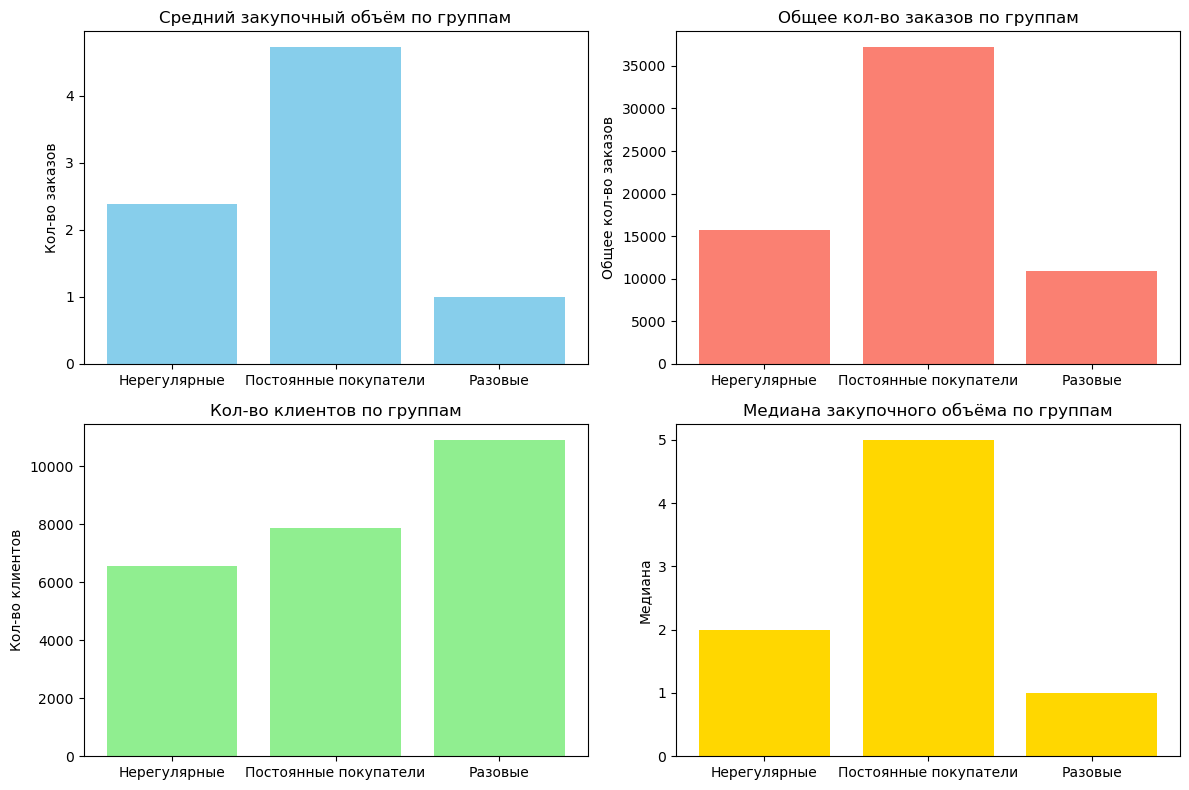

Purchase Count
1    10903
2     4019
3     2553
4     2199
5     5678
Name: count, dtype: int64


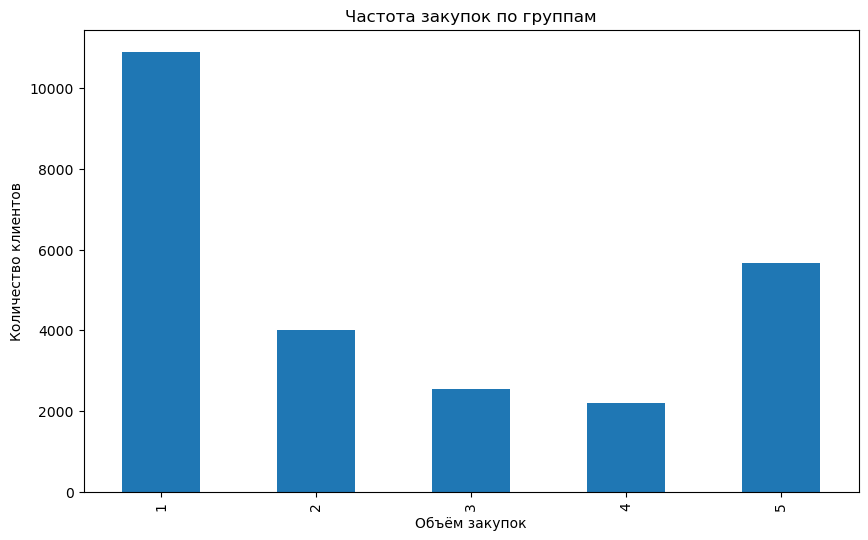

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

#сначала сделаю простой анализ и подготовлю инфу для прогноза и визуализации здесь, в конце откомментить можете и посмотреть что получилось, я уберу, чтобы не мешалось в терминале

client_purchase_analysis = pd.read_csv('test_task_grouped_clients.csv')

analysis_by_group = client_purchase_analysis.groupby('Group').agg({
    'Purchase Count': ['mean', 'sum', 'count']
}).reset_index()
analysis_by_group.columns = ['Group', 'Mean Purchase Count', 'Total Purchases', 'Number of Clients']
analysis_by_group['Median Purchase Count'] = client_purchase_analysis.groupby('Group')['Purchase Count'].median().values
#print(analysis_by_group)

#теперь показываю

fig, axs = plt.subplots(2, 2, figsize=(12, 8))

#это средняя

axs[0, 0].bar(analysis_by_group['Group'], analysis_by_group['Mean Purchase Count'], color='skyblue')
axs[0, 0].set_title('Средний закупочный объём по группам')
axs[0, 0].set_ylabel('Кол-во заказов')

#общая

axs[0, 1].bar(analysis_by_group['Group'], analysis_by_group['Total Purchases'], color='salmon')
axs[0, 1].set_title('Общее кол-во заказов по группам')
axs[0, 1].set_ylabel('Общее кол-во заказов')

#кол-во клиентов

axs[1, 0].bar(analysis_by_group['Group'], analysis_by_group['Number of Clients'], color='lightgreen')
axs[1, 0].set_title('Кол-во клиентов по группам')
axs[1, 0].set_ylabel('Кол-во клиентов')

#медиана

axs[1, 1].bar(analysis_by_group['Group'], analysis_by_group['Median Purchase Count'], color='gold')
axs[1, 1].set_title('Медиана закупочного объёма по группам')
axs[1, 1].set_ylabel('Медиана')
plt.tight_layout()
plt.savefig("simple_analysis.png")

plt.show()
#print(analysis_by_group)
purchase_freq = client_purchase_analysis['Purchase Count'].value_counts().sort_index()
purchase_freq.columns = ['Number of Purchases', 'Number of Clients']
purchase_freq.to_csv('purchase_frequency_distribution.csv', index=False)
print(purchase_freq.head())
plt.figure(figsize=(10, 6))
purchase_freq.plot(kind='bar')
plt.title('Частота закупок по группам')
plt.xlabel('Объём закупок')
plt.ylabel('Количество клиентов')
plt.savefig("simple_analysis_2.png")

plt.show()